In [1]:
import sys
import pandas as pd
import copy
import numpy as np
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import datetime
import itertools
sys.path.append("C:/dev/pyktrader3/")
from pycmqlib3.utility import misc
from bktest import backtest
import pycmqlib3.analytics.data_handler as dh


In [2]:
ferrous_products_mkts = ['rb', 'hc', 'i', 'j', 'jm']
ferrous_mixed_mkts = ['ru', 'FG', 'ZC', 'SM', "SF", 'nr']
base_metal_mkts = ['cu', 'al', 'zn', 'pb', 'ni', 'sn', 'ss']
precious_metal_mkts = ['au', 'ag']
ind_metal_mkts = ferrous_products_mkts + ferrous_mixed_mkts + base_metal_mkts  
petro_chem_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'fu', 'eg', 'eb', 'lu', 'pg'] 
ind_all_mkts = ind_metal_mkts + petro_chem_mkts
ags_oil_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs'] #, 'b']
ags_soft_mkts = ['CF', 'SR', 'jd', 'AP', 'sp', 'CJ', 'UR', 'SA'] # 'CY', 
ags_all_mkts = ags_oil_mkts + ags_soft_mkts
eq_fut_mkts = ['IF', 'IH', 'IC']
bond_fut_mkts = ['T', 'TF']
fin_all_mkts = eq_fut_mkts + bond_fut_mkts
commod_all_mkts = ind_all_mkts + ags_all_mkts + precious_metal_mkts
all_markets = commod_all_mkts + fin_all_mkts
daily_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,6,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2014,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,5,1),  'sn':datetime.date(2017,4,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2016, 4, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2016, 7, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 5, 1), 'lu': datetime.date(2020, 10, 1), 'nr': datetime.date(2020,1,1)}
min_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,6,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2014,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,5,1),  'sn':datetime.date(2017,4,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2016, 4, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2016, 7, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 5, 1), 'lu': datetime.date(2020, 10, 1), 'nr': datetime.date(2020,1,1),}

In [11]:
field_list = ['open', 'high', 'low', 'close', 'volume', 'openInterest', 'contract', 'shift']
factor_list = ['lrstd','upstd','lrskew','lrkurt','mincnt','volmf','oimf','trdstr','volmfratio']
shared_cols = ['date', 'split_idx']
start_date = datetime.date(2011, 1, 1)
end_date = datetime.date(2021, 12, 24)
pnl_tenors = ['1y', '2y', '3y', '4y', '5y', '6y', '7y', '8y', '9y']

delimiter = '-'
atr_win = 20
file_folder = "C:\\dev\\data\\data_cache\\"

sim_products = ind_all_mkts + ags_all_mkts # ['IF', 'IH', 'IC', 'TF', 'T'] #
need_shift = 1
freq = 'd'

if freq == 'd':
    sim_start_dict = daily_start_dict
else:
    sim_start_dict = min_start_dict
    
dbtbl_prefix = ''
args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
ferrous_products_args = args
ferro_mixed_mkt_args = args
base_args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
base2_args = {'roll_rule': '-40b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
v_args  = {'roll_rule': '-28b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
sc_args = {'roll_rule': '-20b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
eq_args = {'roll_rule': '-1b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
bond_args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
precious_args = {'roll_rule': '-25b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}

df_list = []

for idx, asset in enumerate(sim_products):
    use_args = copy.copy(args)
    if asset in eq_fut_mkts:
        use_args = eq_args
    elif asset in ['cu', 'al', 'zn', 'pb', 'sn']:
        use_args = base_args
    elif asset in ['ni']:
        use_args = base2_args
    elif asset in ['sc']:
        use_args = sc_args
    elif asset in ['v']:
        use_args = v_args
    elif asset in bond_fut_mkts:
        use_args = bond_args
    elif asset in precious_metal_mkts:
        use_args = precious_args
    use_args['start_date'] = max(sim_start_dict.get(asset, start_date), start_date)
    use_args['end_date'] = end_date        
    for idy, nb in enumerate([1, 2]):
        if freq == 'd':
            use_args['n'] = nb
            print("loading mkt = %s, nb = %s, args = %s" % (asset, nb, use_args))
            df = misc.nearby(asset, **use_args)
            df.index.name = 'date'
            xdf = df[field_list]
        else:
            filename = "%s_%s_%s_%s.csv" % (asset, nb, freq, end_date.strftime("%Y%m%d"))
            df = pd.read_csv(file_folder + filename, index_col=0)
            df['date'] = df['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))            
            df['datetime'] = df['datetime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
            df = df.drop_duplicates(subset=['date', 'split_idx'], keep='last').set_index(['date', 'split_idx'])
            df = df.drop(['cum_idx'], axis=1)
            ep_field = [ col for col in df.columns if 'exec_price' in col]
            xdf = df[field_list + ep_field + factor_list]
            #xdf['expiry'] = xdf['contract'].apply(lambda x: misc.contract_expiry(x, misc.CHN_Holidays))
        xdf['contmth'] = xdf['contract'].apply(lambda x: misc.inst2contmth(x))
        xdf['mth'] = xdf['contmth'].apply(lambda x: x//100 * 12 + x % 100)
        midx = pd.MultiIndex(levels=[[asset +str(nb),], xdf.columns], 
                             codes=[[0] * len(xdf.columns), [idx for idx in range(len(xdf.columns))]])
        xdf.columns = midx
        df_list.append(xdf)

df = pd.concat(df_list, axis = 1, sort = False).sort_index()
if freq == 'd':
    df.index.name = 'date'
df = df.reset_index()
if freq != 'd':
    df['date'] = df['date'].dt.date

print(df.tail(20))


loading mkt = rb, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2011, 1, 1), 'end_date': datetime.date(2021, 12, 24), 'n': 1}
loading mkt = rb, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2011, 1, 1), 'end_date': datetime.date(2021, 12, 24), 'n': 2}
loading mkt = hc, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2016, 4, 1), 'end_date': datetime.date(2021, 12, 24), 'n': 1}
loading mkt = hc, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2016, 4, 1), 'end_date': datetime.date(2021, 12, 24), 'n': 2}
loading mkt = i, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2014, 1, 1), 'end_date': datetime.date(2021, 12, 24), 'n': 1}
loading mkt = i, nb = 2, a

loading mkt = TA, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2012, 4, 15), 'end_date': datetime.date(2021, 12, 24), 'n': 1}
loading mkt = TA, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2012, 4, 15), 'end_date': datetime.date(2021, 12, 24), 'n': 2}
loading mkt = MA, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2012, 1, 1), 'end_date': datetime.date(2021, 12, 24), 'n': 1}
loading mkt = MA, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2012, 1, 1), 'end_date': datetime.date(2021, 12, 24), 'n': 2}
loading mkt = bu, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2015, 9, 15), 'end_date': datetime.date(2021, 12, 24), 'n': 1}
loading mkt = bu, nb =

loading mkt = jd, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2014, 5, 1), 'end_date': datetime.date(2021, 12, 24), 'n': 2}
loading mkt = AP, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2018, 1, 1), 'end_date': datetime.date(2021, 12, 24), 'n': 1}
loading mkt = AP, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2018, 1, 1), 'end_date': datetime.date(2021, 12, 24), 'n': 2}
loading mkt = sp, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2019, 5, 1), 'end_date': datetime.date(2021, 12, 24), 'n': 1}
loading mkt = sp, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2019, 5, 1), 'end_date': datetime.date(2021, 12, 24), 'n': 2}
loading mkt = CJ, nb = 1,

In [120]:
import random
import numpy as np

def resampled_estimator(data, func_name = 'std', monte_carlo_count=500):
    """    Get a distribution of skew estimates
    :param data: some time series    
    :param monte_carlo_count: number of goes we monte carlo for    
    :return: list    """
    estimate_distribution = []
    for _notUsed in range(monte_carlo_count):
        resample_index = [int(random.uniform(0,len(data))) for _alsoNotUsed in range(len(data))]
        resampled_data = data[resample_index]
        if func_name == 'sharpe_ratio':
            sample_estimate = 16.0 * resampled_data.mean()/resampled_data.std()
        else:
            sample_estimate = getattr(resampled_data, func_name)()
        estimate_distribution.append(sample_estimate)
    return estimate_distribution

def resampled_estimator_multiple_assets(df, asset_list, func_name = 'std', field = 'lr', monte_carlo_count=500):
    """    Get a distribution of skew estimates
    :param data: some time series    
    :param monte_carlo_count: number of goes we monte carlo for    
    :return: list    """
    estimate_distribution = []
    for _notUsed in range(monte_carlo_count):
        asset = asset_list[int(random.uniform(0, len(asset_list)))]
        data = df[asset, field]
        resample_index = [int(random.uniform(0,len(data))) for _alsoNotUsed in range(len(data))]
        resampled_data = data[resample_index]
        if func_name == 'sharpe_ratio':
            sample_estimate = 16.0 * resampled_data.mean()/resampled_data.std()
        else:
            sample_estimate = getattr(resampled_data, func_name)()
        estimate_distribution.append(sample_estimate)
    return estimate_distribution

In [8]:
import matplotlib.pyplot as pyplot
pyplot.hist(est_dist, bins = 30)

Index([                 'date',         ('rb1', 'open'),
               ('rb1', 'high'),          ('rb1', 'low'),
              ('rb1', 'close'),       ('rb1', 'volume'),
       ('rb1', 'openInterest'),     ('rb1', 'contract'),
              ('rb1', 'shift'),      ('rb1', 'contmth'),
       ...
               ('SA2', 'open'),         ('SA2', 'high'),
                ('SA2', 'low'),        ('SA2', 'close'),
             ('SA2', 'volume'), ('SA2', 'openInterest'),
           ('SA2', 'contract'),        ('SA2', 'shift'),
            ('SA2', 'contmth'),          ('SA2', 'mth')],
      dtype='object', length=921)

In [111]:
for asset in sim_products:
    for nb in range(1,3):
        df.loc[:,(asset+str(nb), 'diff')] = df.loc[:, (asset+str(nb), 'close')].diff()
        df.loc[:, (asset+str(nb), 'ret')] = df[asset+str(nb), 'diff']/(df[asset+str(nb), 'close']-df[asset+str(nb), 'shift']).shift(1)
        df.loc[:, (asset+str(nb), 'lr')] = np.log(df.loc[:, (asset+str(nb), 'ret')] + 1)
xdf = df.set_index('date')

In [131]:
cutoff_date = datetime.date(2011,1,1)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(1, 0, 'rb'),
  Text(2, 0, 'hc'),
  Text(3, 0, 'i'),
  Text(4, 0, 'j'),
  Text(5, 0, 'jm'),
  Text(6, 0, 'ru'),
  Text(7, 0, 'FG'),
  Text(8, 0, 'ZC'),
  Text(9, 0, 'SM'),
  Text(10, 0, 'SF'),
  Text(11, 0, 'nr'),
  Text(12, 0, 'cu'),
  Text(13, 0, 'al'),
  Text(14, 0, 'zn'),
  Text(15, 0, 'pb'),
  Text(16, 0, 'ni'),
  Text(17, 0, 'sn'),
  Text(18, 0, 'ss'),
  Text(19, 0, 'l'),
  Text(20, 0, 'pp'),
  Text(21, 0, 'v'),
  Text(22, 0, 'TA'),
  Text(23, 0, 'MA'),
  Text(24, 0, 'bu'),
  Text(25, 0, 'sc'),
  Text(26, 0, 'fu'),
  Text(27, 0, 'eg'),
  Text(28, 0, 'eb'),
  Text(29, 0, 'lu'),
  Text(30, 0, 'pg'),
  Text(31, 0, 'm'),
  Text(32, 0, 'RM'),
  Text(33, 0, 'y'),
  Text(34, 0, 'p'),
  Text(35, 0, 'OI'),
  Text(36, 0, 'a'),
  Text(37, 0, 'c'),
  Text(38, 0, 'cs'),
  Text(39,

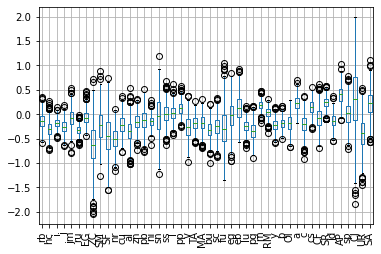

In [132]:
field = 'lr'
func_name = 'skew'
df_dist = {}
for asset in sim_products:
    est_dist = resampled_estimator(xdf.loc[cutoff_date:, (asset+'1', field)], 
                                   func_name = func_name, 
                                   monte_carlo_count=1000)
    df_dist[asset] = pd.Series(est_dist)
df_skew_dist = pd.DataFrame(df_dist)
df_skew_dist.boxplot()
pyplot.xticks(rotation=90)

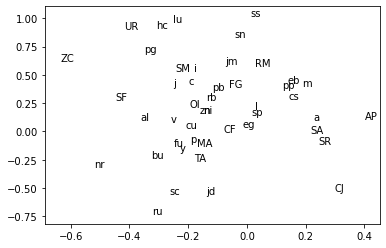

In [133]:
avg_returns = [xdf.loc[cutoff_date:, (asset + '1', field)].mean() for asset in sim_products]
sharpe_ratios = [16.0*xdf.loc[cutoff_date:, (asset + '1', field)].mean()
                 /xdf.loc[cutoff_date:, (asset + '1', field)].std() 
                 for asset in sim_products]
skew_list = [xdf.loc[cutoff_date:, (asset + '1', field)].skew() for asset in sim_products]

fig, ax = pyplot.subplots()
ax.scatter(skew_list, sharpe_ratios, marker="")

for i, txt in enumerate(sim_products):
    ax.annotate(txt, (skew_list[i], sharpe_ratios[i]))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(1, 0, 'rb'),
  Text(2, 0, 'hc'),
  Text(3, 0, 'i'),
  Text(4, 0, 'j'),
  Text(5, 0, 'jm'),
  Text(6, 0, 'ru'),
  Text(7, 0, 'FG'),
  Text(8, 0, 'ZC'),
  Text(9, 0, 'SM'),
  Text(10, 0, 'SF'),
  Text(11, 0, 'nr'),
  Text(12, 0, 'cu'),
  Text(13, 0, 'al'),
  Text(14, 0, 'zn'),
  Text(15, 0, 'pb'),
  Text(16, 0, 'ni'),
  Text(17, 0, 'sn'),
  Text(18, 0, 'ss'),
  Text(19, 0, 'l'),
  Text(20, 0, 'pp'),
  Text(21, 0, 'v'),
  Text(22, 0, 'TA'),
  Text(23, 0, 'MA'),
  Text(24, 0, 'bu'),
  Text(25, 0, 'sc'),
  Text(26, 0, 'fu'),
  Text(27, 0, 'eg'),
  Text(28, 0, 'eb'),
  Text(29, 0, 'lu'),
  Text(30, 0, 'pg'),
  Text(31, 0, 'm'),
  Text(32, 0, 'RM'),
  Text(33, 0, 'y'),
  Text(34, 0, 'p'),
  Text(35, 0, 'OI'),
  Text(36, 0, 'a'),
  Text(37, 0, 'c'),
  Text(38, 0, 'cs'),
  Text(39,

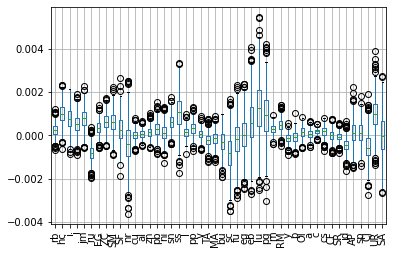

In [134]:
field = 'lr'
func_name = 'mean'
df_dist = {}
for asset in sim_products:
    est_dist = resampled_estimator(xdf.loc[cutoff_date:, (asset+'1', field)], 
                                   func_name = func_name, 
                                   monte_carlo_count=1000)
    df_dist[asset] = pd.Series(est_dist)
df_mean_dist = pd.DataFrame(df_dist)
df_mean_dist.boxplot()
pyplot.xticks(rotation=90)

In [135]:
skew_by_code = df_skew_dist.mean()
avg_skew = np.mean(skew_by_code.values)
low_skew_codes = list(skew_by_code[skew_by_code<avg_skew].index)
high_skew_codes = list(skew_by_code[skew_by_code>=avg_skew].index)

df_mean_distribution_multiple = dict()
df_mean_distribution_multiple['High skew'] = resampled_estimator_multiple_assets(percentage_returns,high_skew_codes,1000)
df_mean_distribution_multiple['Low skew'] = resampled_estimator_multiple_assets(percentage_returns,low_skew_codes,1000)

df_mean_distribution_multiple = pd.DataFrame(df_mean_distribution_multiple)
df_mean_distribution_multiple.boxplot()

NameError: name 'resampled_mean_estimator_multiple_codes' is not defined

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
9995    1.0
9996    1.0
9997    1.0
9998    1.0
9999    1.0
Length: 10000, dtype: float64

In [123]:
from scipy import stats

In [142]:
all_SR_list = []
all_tstats=[]
all_frequencies = ["7D", "14D", "21D", "1M", "2M", "3M", "6M", "9M", "12M"]

skew_mode = 'xs'
cutoff_date = datetime.date(2011,1,1)

for freqtouse in all_frequencies:
    all_results = []
    skew_df = {}
    for asset in sim_products:
        asset_skew = xdf.loc[cutoff_date:, (asset + '1', field)].rolling(freqtouse).skew()
        skew_df[asset] = asset_skew
    skew_df_all = pd.DataFrame(skew_df)
    skew_df_median = skew_df_all,median(axis=1)
    for asset in sim_products:
            # we're going to do rolling returns        
            perc_returns = xdf.loc[cutoff_date:, (asset + '1', field)]
            all_skew = perc_returns.rolling(250*3).skew()
            start_date = perc_returns.index[0]
            end_date = perc_returns.index[-1]
            periodstarts = list(pd.date_range(start_date, end_date, freq=freqtouse)) + [
                end_date]

            for periodidx in range(len(periodstarts) - 2):   
                p_start = periodstarts[periodidx] + pd.DateOffset(-1)
                p_end = periodstarts[periodidx+1] + pd.DateOffset(-1)
                s_start = periodstarts[periodidx+1]
                s_end = periodstarts[periodidx+2]

                period_skew = perc_returns[p_start:p_end].skew()
                if skew_mode == 'ts':
                    avg_skew = all_skew[:p_end][-1]
                    period_skew = period_skew - avg_skew
                elif skew_mode == 'xs':
                    avg_skew = skew_df_median[:p_end][-1]
                    period_skew = period_skew - avg_skew
                subsequent_return = perc_returns[s_start:s_end].mean()
                subsequent_vol = perc_returns[s_start:s_end].std()
                subsequent_SR = 16*(subsequent_return / subsequent_vol)

                if np.isnan(subsequent_SR) or np.isnan(period_skew):
                    continue                
                else:
                    all_results.append([period_skew, subsequent_SR])

    all_results=pd.DataFrame(all_results, columns=['x', 'y'])
    avg_skew = all_results.x.median()
    all_results[all_results.x>avg_skew].y.median()
    all_results[all_results.x<avg_skew].y.median()

    subsequent_sr_distribution = dict()
    subsequent_sr_distribution['High_skew'] = all_results[all_results.x>=avg_skew].y
    subsequent_sr_distribution['Low_skew'] = all_results[all_results.x<avg_skew].y

    subsequent_sr_distribution = pd.DataFrame(subsequent_sr_distribution)

    med_SR =subsequent_sr_distribution.median()
    tstat = stats.ttest_ind(subsequent_sr_distribution.High_skew, subsequent_sr_distribution.Low_skew, nan_policy="omit").statistic
    all_SR_list.append(med_SR)
    all_tstats.append(tstat)

all_tstats = pd.Series(all_tstats, index=all_frequencies)
all_tstats.plot()

ValueError: window must be an integer 0 or greater

<AxesSubplot:>

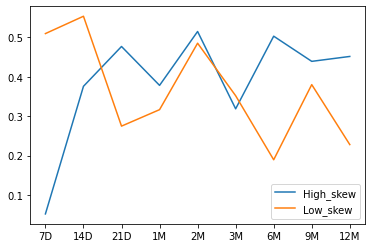

In [141]:
all_SR_list = pd.DataFrame(all_SR_list, index=all_frequencies)
all_SR_list.plot()